# 1. Data Loading

In [1]:
STATE=34

In [2]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = os.path.join(os.getcwd(), 'dataset')
OUTPUT_DIR = os.path.join(os.getcwd(), 'output')
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
target = pd.read_csv(os.path.join(DATA_DIR, 'target.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
whole = pd.concat([train, test], axis=0, ignore_index=True)

In [4]:
train["target"] = target["coppaRisk"]
train["target"] = train["target"].astype(int)

# 2. Data Description

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      6936 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        4851 non-null   object 
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   6250 non-null   object 
 7   hasTermsOfServiceLink            2365 non-null   object 
 8   hasTermsOfServiceLinkRating      2365 non-null   object 
 9   isCorporateEmailScore            5872 non-null   float64
 10  adSpent                          1321 non-null   float64
 11  appAge                           6950 non-null   float64
 12  averageUserRating   

In [6]:
train.describe(include='all')

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,target
count,7000,6936,7.000000e+03,7000,4851,7000,6250,2365,2365,5872.000000,1.321000e+03,6950.000000,5768.000000,838,7000,7000,7000.000000
unique,114,119,NaN,46,26,5,2,2,2,NaN,NaN,NaN,NaN,3,3,3,NaN
top,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,NaN,Games,100 - 500,GLOBAL,True,False,high,NaN,NaN,NaN,NaN,medium,low,low,NaN
freq,4338,5802,NaN,1828,699,6045,6189,1424,1424,NaN,NaN,NaN,NaN,536,5652,6983,NaN
mean,NaN,NaN,3.256274e+04,NaN,NaN,NaN,NaN,NaN,NaN,45.740293,3.977563e+03,57.093060,2.482490,NaN,NaN,NaN,0.099429
std,NaN,NaN,5.501431e+05,NaN,NaN,NaN,NaN,NaN,NaN,49.361215,9.219919e+04,37.169895,1.905712,NaN,NaN,NaN,0.299258
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.038525e-03,0.533333,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.086920e+00,27.533333,0.000000,NaN,NaN,NaN,0.000000
50%,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.945580e+00,52.866667,3.000000,NaN,NaN,NaN,0.000000
75%,NaN,NaN,8.800000e+01,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,4.908375e+01,80.000000,4.000000,NaN,NaN,NaN,0.000000


In [7]:
test.describe(include='all')

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
count,3000.000000,3000,2971,3.000000e+03,3000,2119,3000,2684,1039,1039,2560.000000,574.000000,2983.000000,2486.000000,329,3000,3000
unique,NaN,89,92,NaN,45,21,5,2,2,2,NaN,NaN,NaN,NaN,3,3,3
top,NaN,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,NaN,Games,100 - 500,GLOBAL,True,False,high,NaN,NaN,NaN,NaN,medium,low,low
freq,NaN,1821,2470,NaN,805,334,2603,2652,643,643,NaN,NaN,NaN,NaN,213,2451,2996
mean,5016.298333,NaN,NaN,3.576905e+04,NaN,NaN,NaN,NaN,NaN,NaN,46.444922,286.612276,56.044396,2.490748,NaN,NaN,NaN
std,2894.991128,NaN,NaN,4.455556e+05,NaN,NaN,NaN,NaN,NaN,NaN,49.415285,1890.997697,36.417410,1.896230,NaN,NaN,NaN
min,1.000000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.007450,-1.200000,0.000000,NaN,NaN,NaN
25%,2495.750000,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.121507,26.933333,0.000000,NaN,NaN,NaN
50%,4969.500000,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,7.186537,51.933333,3.000000,NaN,NaN,NaN
75%,7585.500000,NaN,NaN,8.250000e+01,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,44.878463,77.750000,4.000000,NaN,NaN,NaN


In [8]:
train.head()

,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating,target
0,NORWAY,RO,127731,Sports,NaN,smartphone,True,True,low,99.0,14.017220,160.400000,4.0,medium,low,low,0
1,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Medical,50 - 100,GLOBAL,True,NaN,NaN,99.0,NaN,17.500000,0.0,NaN,low,low,0
2,UNITED ARAB EMIRATES,CZ,51143,Games,50000000 - 100000000,GLOBAL,True,True,low,0.0,31.883163,30.766667,4.0,NaN,low,low,0
3,GERMANY,GLOBAL,1074,Games,NaN,GLOBAL,True,NaN,NaN,99.0,NaN,71.533333,4.0,NaN,low,low,0
4,CANNOT IDENTIFY COUNTRY,GLOBAL,17,Tools,1000 - 5000,GLOBAL,True,NaN,NaN,99.0,NaN,52.400000,4.0,NaN,low,low,0


In [9]:
test.head()

,ID,developerCountry,countryCode,userRatingCount,primaryGenreName,downloads,deviceType,hasPrivacyLink,hasTermsOfServiceLink,hasTermsOfServiceLinkRating,isCorporateEmailScore,adSpent,appAge,averageUserRating,appContentBrandSafetyRating,appDescriptionBrandSafetyRating,mfaRating
0,2807,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,2,Medical,NaN,GLOBAL,True,NaN,NaN,NaN,NaN,81.600000,5.0,NaN,low,low
1,1742,ICELAND,EMEA,0,Games,5000 - 10000,GLOBAL,True,True,low,0.0,0.027742,24.700000,0.0,NaN,low,low
2,806,UNITED STATES,RU,13059,Games,NaN,smartphone,True,False,high,99.0,9.249056,40.300000,4.0,NaN,low,low
3,2635,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Games,NaN,GLOBAL,True,False,high,NaN,NaN,39.233333,0.0,NaN,medium,low
4,9047,ADDRESS NOT LISTED IN PLAYSTORE,GLOBAL,0,Shopping,NaN,GLOBAL,NaN,NaN,NaN,NaN,NaN,65.533333,0.0,NaN,low,low


In [10]:
train.isnull().sum()

developerCountry                      0
countryCode                          64
userRatingCount                       0
primaryGenreName                      0
downloads                          2149
deviceType                            0
hasPrivacyLink                      750
hasTermsOfServiceLink              4635
hasTermsOfServiceLinkRating        4635
isCorporateEmailScore              1128
adSpent                            5679
appAge                               50
averageUserRating                  1232
appContentBrandSafetyRating        6162
appDescriptionBrandSafetyRating       0
mfaRating                             0
target                                0
dtype: int64

In [11]:
test.isnull().sum()

ID                                    0
developerCountry                      0
countryCode                          29
userRatingCount                       0
primaryGenreName                      0
downloads                           881
deviceType                            0
hasPrivacyLink                      316
hasTermsOfServiceLink              1961
hasTermsOfServiceLinkRating        1961
isCorporateEmailScore               440
adSpent                            2426
appAge                               17
averageUserRating                   514
appContentBrandSafetyRating        2671
appDescriptionBrandSafetyRating       0
mfaRating                             0
dtype: int64

# 3. Exploratory Data Analysis

## Categorical and Numerical Cols

In [12]:
cat_cols = train.select_dtypes(include=['object']).columns
num_cols = train.select_dtypes(exclude=['object']).columns

In [13]:
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")

Categorical columns: Index(['developerCountry', 'countryCode', 'primaryGenreName', 'downloads',
       'deviceType', 'hasPrivacyLink', 'hasTermsOfServiceLink',
       'hasTermsOfServiceLinkRating', 'appContentBrandSafetyRating',
       'appDescriptionBrandSafetyRating', 'mfaRating'],
      dtype='object')
Numerical columns: Index(['userRatingCount', 'isCorporateEmailScore', 'adSpent', 'appAge',
       'averageUserRating', 'target'],
      dtype='object')


## Target Distribution

<Axes: xlabel='target'>

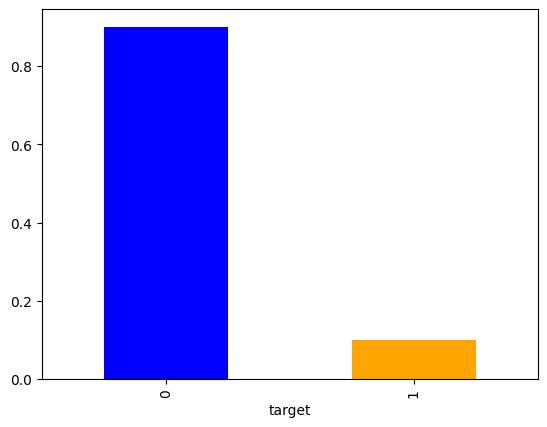

In [14]:
train['target'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

In [15]:
train['target'].value_counts()

target
0    6304
1     696
Name: count, dtype: int64

In [16]:
print(f"Percentage: {train['target'].value_counts()[0]/train.shape[0]}")

Percentage: 0.9005714285714286


## Numerical Correlations

Text(0.5, 1.0, 'Correlation Heatmap')

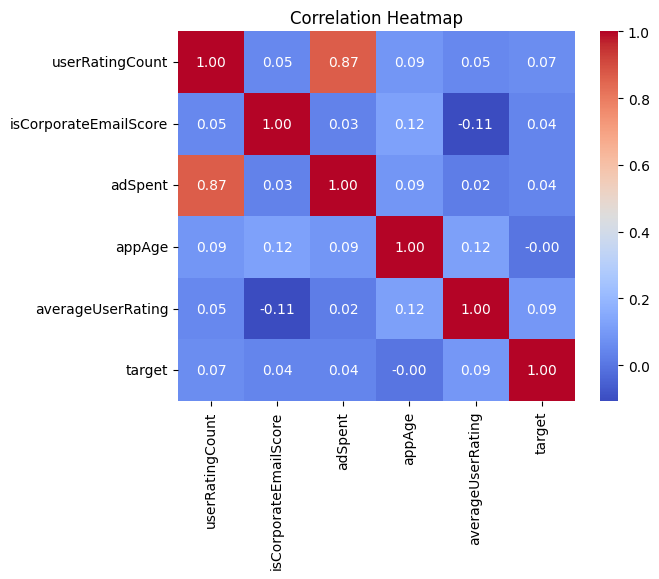

In [17]:
sns.heatmap(train[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

## Pairplot

In [18]:
# sns.pairplot(train, hue='target', palette='coolwarm')

## User Rating Count

In [19]:
train["userRatingCount"].value_counts()

userRatingCount
0        3338
1         238
6         123
5         117
7         100
         ... 
40168       1
855         1
11408       1
5588        1
4606        1
Name: count, Length: 1528, dtype: int64

In [20]:
test["userRatingCount"].value_counts()

userRatingCount
0       1414
1         89
6         68
5         52
2         45
        ... 
204        1
5527       1
61         1
1022       1
7166       1
Name: count, Length: 763, dtype: int64

## Downloads

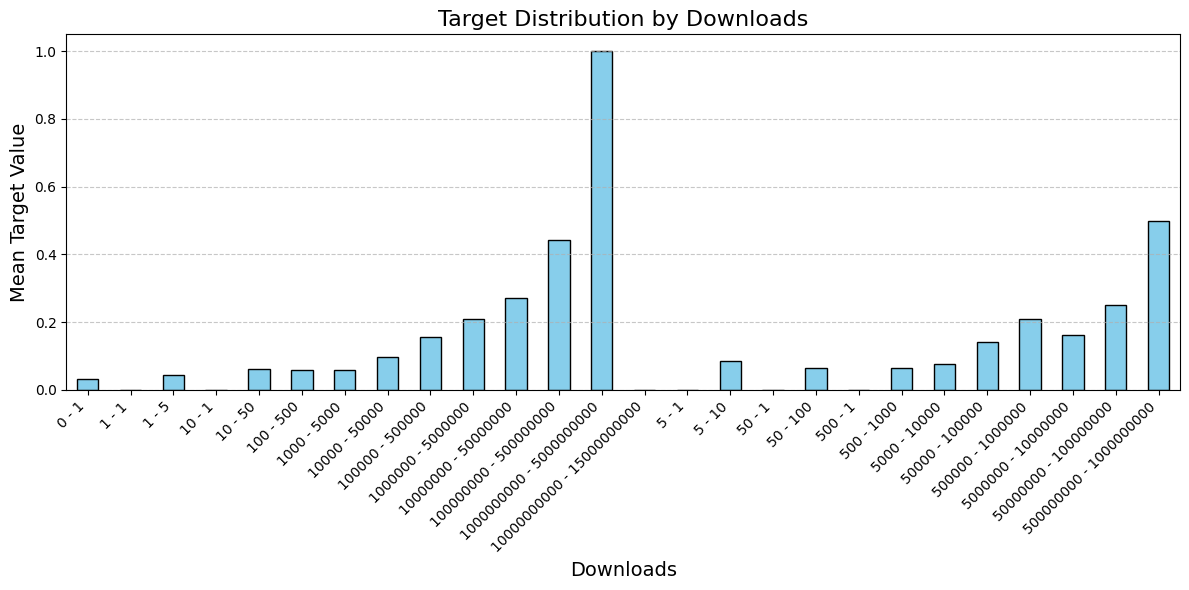

In [21]:
# Group by downloads and calculate the mean target value
downloads_target = train.groupby('downloads')['target'].mean()

# Plot the target distribution
plt.figure(figsize=(12, 6))
downloads_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Distribution by Downloads', fontsize=16)
plt.xlabel('Downloads', fontsize=14)
plt.ylabel('Mean Target Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Genre

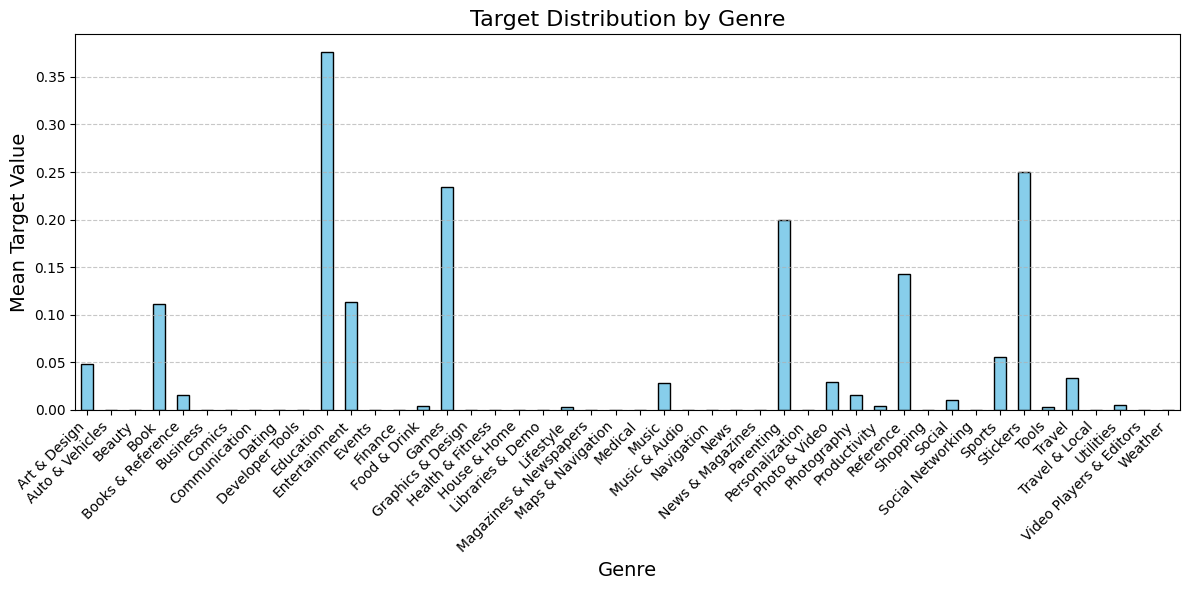

In [22]:
# Group by primaryGenreName and calculate the mean target value
downloads_target = train.groupby('primaryGenreName')['target'].mean()

# Plot the target distribution
plt.figure(figsize=(12, 6))
downloads_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Distribution by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Mean Target Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## hasPrivacyLink

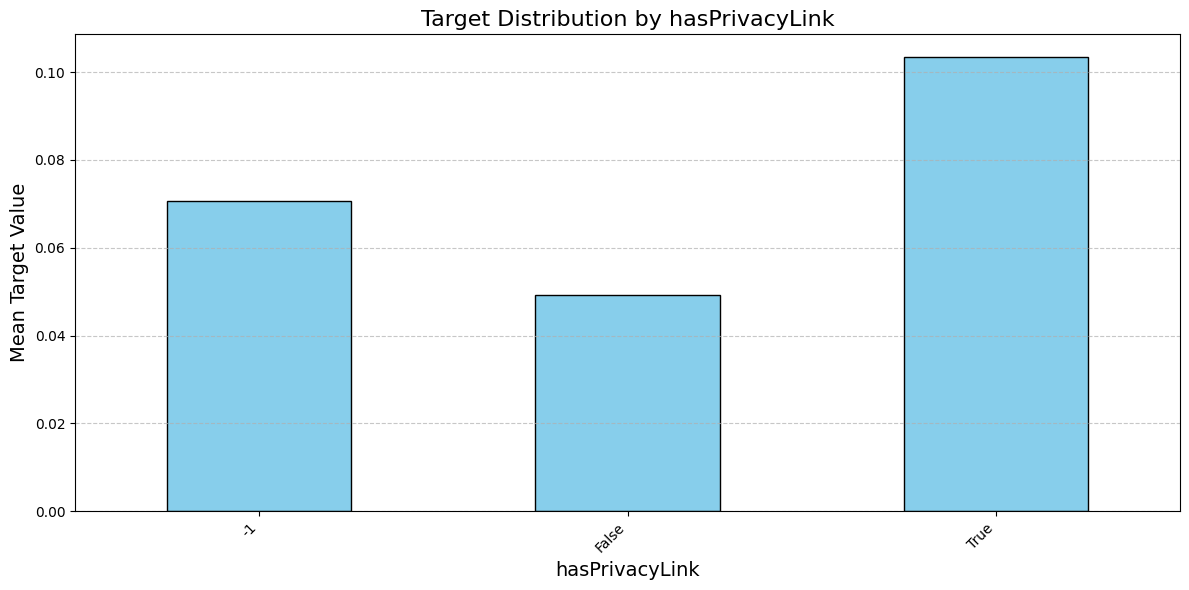

In [23]:
# Group by hasPrivacyLink and calculate the mean target value
filled_df = train.copy()
filled_df["hasPrivacyLink"] = filled_df["hasPrivacyLink"].fillna(-1)
downloads_target = filled_df.groupby("hasPrivacyLink")["target"].mean()

# Plot the target distribution
plt.figure(figsize=(12, 6))
downloads_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Distribution by hasPrivacyLink', fontsize=16)
plt.xlabel('hasPrivacyLink', fontsize=14)
plt.ylabel('Mean Target Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## hasTermsOfServiceLink

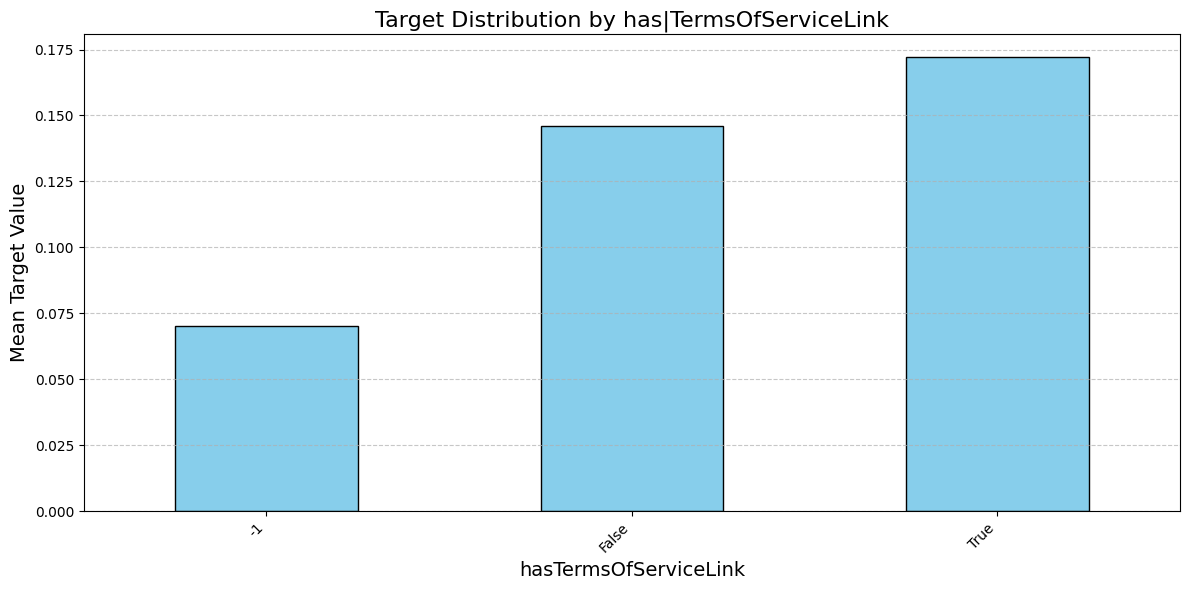

In [24]:
# Group by hasTermsOfServiceLink and calculate the mean target value
filled_df = train.copy()
filled_df["hasTermsOfServiceLink"] = filled_df["hasTermsOfServiceLink"].fillna(-1)
downloads_target = filled_df.groupby("hasTermsOfServiceLink")["target"].mean()

# Plot the target distribution
plt.figure(figsize=(12, 6))
downloads_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Distribution by has|TermsOfServiceLink', fontsize=16)
plt.xlabel('hasTermsOfServiceLink', fontsize=14)
plt.ylabel('Mean Target Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## isCorporateEmailScore

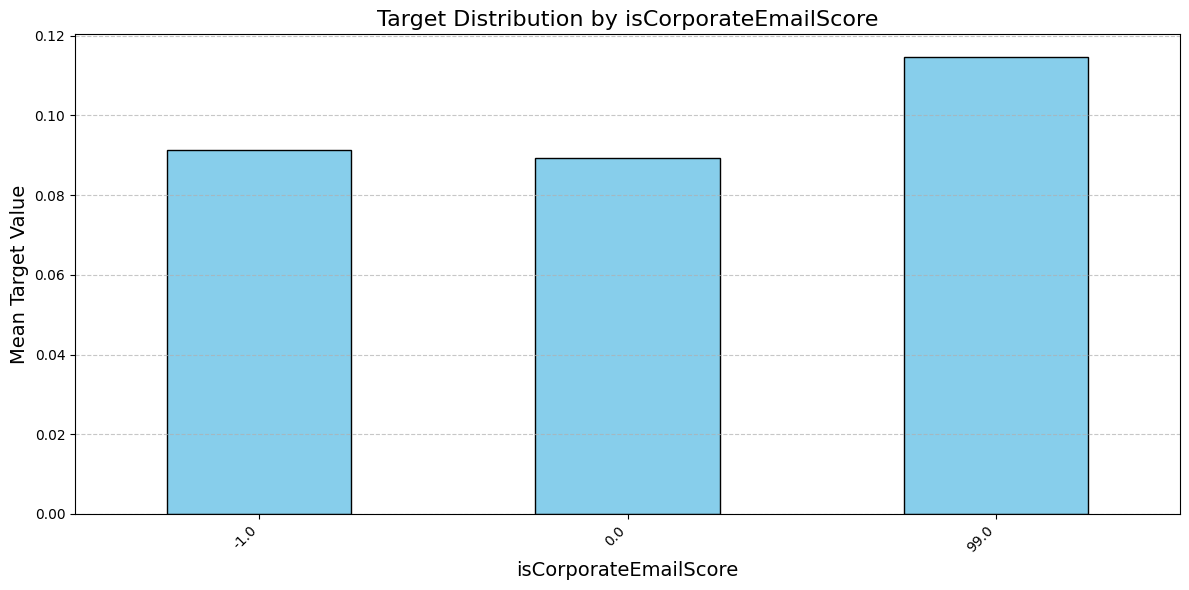

In [25]:
# Group by isCorporateEmailScore and calculate the mean target value
filled_df = train.copy()
filled_df["isCorporateEmailScore"] = filled_df["isCorporateEmailScore"].fillna(-1)
downloads_target = filled_df.groupby("isCorporateEmailScore")["target"].mean()

# Plot the target distribution
plt.figure(figsize=(12, 6))
downloads_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Target Distribution by isCorporateEmailScore', fontsize=16)
plt.xlabel('isCorporateEmailScore', fontsize=14)
plt.ylabel('Mean Target Value', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Preprocessing

## Copy

In [26]:
preproc = train.copy()

## Dropping

too many missing values so will be dropped

In [27]:
preproc.drop("appContentBrandSafetyRating", axis=1, inplace=True)

hasTermsOfServiceLink is hasTermsOfServiceLinkRating NOT operated which is odd, they even share the same missing value locations. So we will drop one of them

In [28]:
preproc.drop("hasTermsOfServiceLinkRating", axis=1, inplace=True)

## Transform downloads to mid point

In [29]:
def parse_download_range(s):
    if pd.isna(s): return 0
    parts = s.split(' - ')
    res = (float(parts[0]) + float(parts[1])) // 2
    return res

In [30]:
preproc["downloads_bin"] = preproc["downloads"].apply(parse_download_range).astype("int64")
preproc["downloads_bin"].value_counts()

downloads_bin
0              2212
300             699
30              673
3000            591
30000           396
750             324
75              310
300000          270
3000000         248
3               225
7               201
7500            185
30000000        173
75000           169
750000          124
7500000         111
300000000        34
75000000         28
1                11
5                 9
12500000000       2
750000000         2
250               1
3000000000        1
25                1
Name: count, dtype: int64

## Impute downloads by rating count

many downloads are missing even though the rating counts are available, so we will impute them based on how many downloads are there per rating count

In [31]:
whole_down = whole.copy()

In [32]:
whole_down["downloads_bin"] = whole["downloads"].apply(parse_download_range).astype("int64")

In [33]:
down_per_rating = whole_down["downloads_bin"].sum() / whole_down["userRatingCount"].sum()
print(f"Downloads per rating: {down_per_rating}")

Downloads per rating: 174.18746418155888


In [34]:
preproc["downloads"].value_counts().sort_index()
d_bins = [0,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,5000000,100000000,500000000,1000000000,5000000000,10000000000,15000000000]

In [35]:
def match_download_impute(s):
    if pd.isna(s): return 0
    if s == 0: return 25
    mult = s*down_per_rating
    for i in range(len(d_bins)-1):
        if mult > d_bins[i] and mult <= d_bins[i+1]:
            return (d_bins[i] + d_bins[i+1]) // 2
    return 15000000000

In [36]:
preproc.loc[preproc["downloads_bin"] == 0, "downloads_bin"] = preproc.loc[preproc["downloads_bin"] == 0, "userRatingCount"].apply(match_download_impute)
preproc["downloads_bin"].value_counts()

downloads_bin
25             1105
300            1032
3000            788
30              673
30000           487
750             450
300000          346
3000000         327
75              310
7500            227
3               225
7               201
75000           199
30000000        173
750000          161
7500000         142
52500000         59
300000000        41
75000000         28
1                11
5                 9
12500000000       2
750000000         2
250               1
3000000000        1
Name: count, dtype: int64

In [37]:
preproc["downloads_bin"].isna().sum()

0

In [38]:
preproc.drop("downloads", axis=1, inplace=True)

## Has Privacy Link

<Axes: xlabel='hasPrivacyLink'>

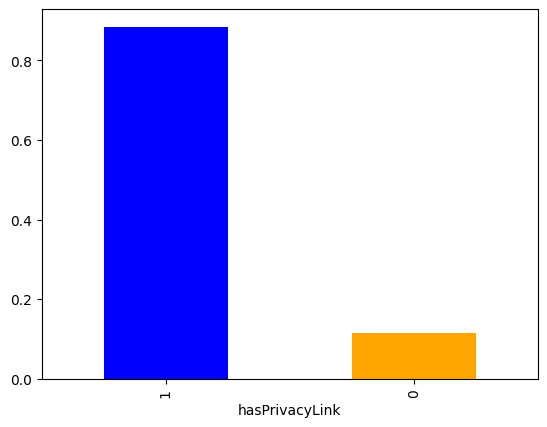

In [39]:
preproc["hasPrivacyLink"]=preproc["hasPrivacyLink"].fillna(0)
preproc["hasPrivacyLink"] = preproc["hasPrivacyLink"].astype(int)
preproc["hasPrivacyLink"].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

## Has Terms of Service Link

<Axes: xlabel='hasTermsOfServiceLink'>

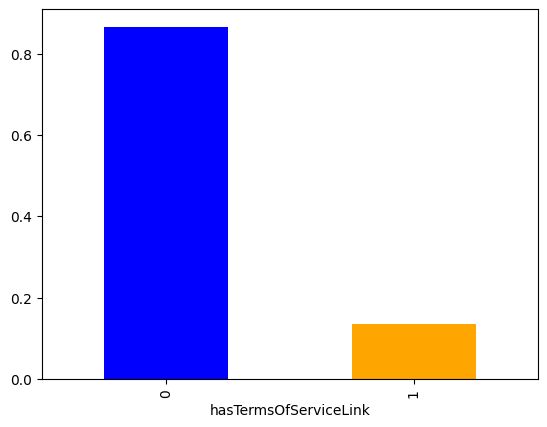

In [40]:
preproc["hasTermsOfServiceLink"]=preproc["hasTermsOfServiceLink"].fillna(0)
preproc["hasTermsOfServiceLink"] = preproc["hasTermsOfServiceLink"].astype(int)
preproc["hasTermsOfServiceLink"].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

## isCorporateEmailScore

this is actually a boolean value of either 0 or 99 so we will convert it such

<Axes: xlabel='isCorporateEmailScore'>

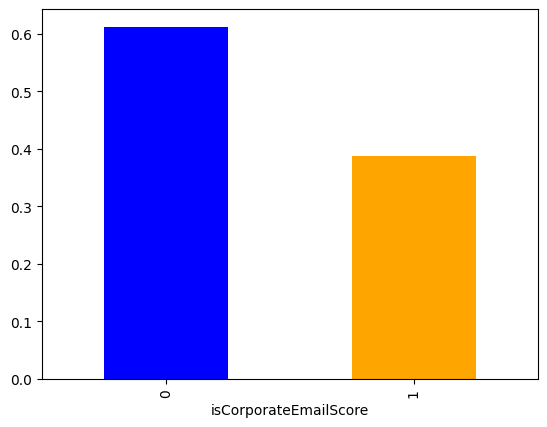

In [41]:
preproc["isCorporateEmailScore"]=preproc["isCorporateEmailScore"].fillna(0)
preproc["isCorporateEmailScore"] = preproc["isCorporateEmailScore"].apply(lambda x: 1 if x == 99 else x).astype(int)
preproc["isCorporateEmailScore"].value_counts(normalize=True).plot(kind='bar', color=['blue', 'orange'])

## adSpent Imputing

In [42]:
preproc["adSpent"]=preproc["adSpent"].fillna(whole["adSpent"].median())
preproc["adSpent"].value_counts()

adSpent
7.750849       5680
2.550090          1
8.060303          1
1.103175          1
5.426410          1
               ... 
118.392022        1
65.479412         1
0.023314          1
2517.752029       1
0.488427          1
Name: count, Length: 1321, dtype: int64

## appAge Imputing

In [43]:
preproc["appAge"] = preproc["appAge"].fillna(whole["appAge"].median())
preproc["appAge"].value_counts()

appAge
52.566667     54
41.000000     10
67.800000      9
3.633333       9
58.500000      9
              ..
166.900000     1
139.766667     1
55.666667      1
147.800000     1
124.033333     1
Name: count, Length: 3194, dtype: int64

## Average User Rating Imputing

if userRating count is 0 obviously Average rating is also 0, otherwise impute median

In [44]:
preproc.loc[preproc["averageUserRating"].isna(), "averageUserRating"] = preproc.loc[preproc["averageUserRating"].isna(), "userRatingCount"].apply(lambda x: 0 if x == 0 else whole["averageUserRating"].median())
preproc["averageUserRating"].value_counts()

averageUserRating
0.0    3172
4.0    2113
3.0     836
5.0     570
2.0     200
1.0     109
Name: count, dtype: int64

In [45]:
preproc.isna().sum()

developerCountry                    0
countryCode                        64
userRatingCount                     0
primaryGenreName                    0
deviceType                          0
hasPrivacyLink                      0
hasTermsOfServiceLink               0
isCorporateEmailScore               0
adSpent                             0
appAge                              0
averageUserRating                   0
appDescriptionBrandSafetyRating     0
mfaRating                           0
target                              0
downloads_bin                       0
dtype: int64

## Ordinal Mapping

### appDescriptionBrandSafetyRating

In [46]:
preproc["appDescriptionBrandSafetyRating"] = preproc["appDescriptionBrandSafetyRating"].map({'low': 0, 'medium': 1, 'high': 2}).fillna(0).astype(int)
preproc["appDescriptionBrandSafetyRating"].value_counts()

appDescriptionBrandSafetyRating
0    5652
1     754
2     594
Name: count, dtype: int64

## MFA Rating

In [47]:
preproc["mfaRating"] = preproc["mfaRating"].map({'low': 0, 'medium': 1, 'high': 2}).fillna(0).astype(int)
preproc["mfaRating"].value_counts()

mfaRating
0    6983
1       9
2       8
Name: count, dtype: int64

In [48]:
preproc["target"].groupby(preproc["mfaRating"]).mean()

mfaRating
0    0.099527
1    0.111111
2    0.000000
Name: target, dtype: float64

## Feature Engineering

### rating_per_adSpent

shows how natural an app grows

In [49]:
preproc["rating_per_adSpent"] = preproc["userRatingCount"] / preproc["adSpent"]
preproc["rating_per_adSpent"] = preproc["rating_per_adSpent"].apply(lambda x: 0 if x == np.inf else x).fillna(0)
preproc["rating_per_adSpent"].value_counts()

rating_per_adSpent
0.000000       3338
0.129018        237
0.774109        119
0.645091        117
0.903127         96
               ... 
1.122033          1
4.165620          1
50.246672         1
1698.847441       1
9430.267924       1
Name: count, Length: 1777, dtype: int64

### rate_adSpent

In [50]:
preproc["rate_adSpent"] = preproc["adSpent"] / (preproc["appAge"]+1)
preproc["rate_adSpent"].value_counts()

rate_adSpent
0.144695    45
0.184544     9
0.130266     9
0.199936     8
0.307167     8
            ..
0.297325     1
0.574137     1
3.606202     1
1.656096     1
0.061990     1
Name: count, Length: 4211, dtype: int64

### rate_ratings

In [51]:
preproc["rate_ratings"] = preproc["userRatingCount"] / (preproc["appAge"]+1)
preproc["rate_ratings"].value_counts()

rate_ratings
0.000000       3338
0.280374          3
0.093342          3
1719.793103       3
0.130678          3
               ... 
0.947368          1
0.634291          1
104.480484        1
1.853282          1
0.010650          1
Name: count, Length: 3598, dtype: int64

## One Hot Encoding

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
onehot_cols = ['developerCountry', 'countryCode', 'primaryGenreName','deviceType']

print(f"One-hot encoding columns: {onehot_cols}")

One-hot encoding columns: ['developerCountry', 'countryCode', 'primaryGenreName', 'deviceType']


In [54]:
preproc[onehot_cols] = preproc[onehot_cols].astype('str')

In [55]:
one_coder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
one_hot_encoded = one_coder.fit_transform(preproc[onehot_cols])
one_hot_df = pd.DataFrame(one_hot_encoded,columns=one_coder.get_feature_names_out(onehot_cols))
preproc.drop(onehot_cols,axis=1,inplace=True)
preproc = pd.concat([preproc,one_hot_df],axis=1)

In [56]:
preproc.head()

,userRatingCount,hasPrivacyLink,hasTermsOfServiceLink,isCorporateEmailScore,adSpent,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,target,...,primaryGenreName_Travel,primaryGenreName_Travel & Local,primaryGenreName_Utilities,primaryGenreName_Video Players & Editors,primaryGenreName_Weather,deviceType_GLOBAL,deviceType_connected-tv/ott,deviceType_smartphone,deviceType_tablet,deviceType_undetermined
0,127731,1,1,1,14.017220,160.400000,4.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,1,0,1,7.750849,17.500000,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,51143,1,1,0,31.883163,30.766667,4.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1074,1,0,1,7.750849,71.533333,4.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,17,1,0,1,7.750849,52.400000,4.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 4.1 Combined Preprocessing Function

In [133]:
def preprocess_data(df, is_train=True):
    """
    Comprehensive preprocessing function that applies all cleaning and feature engineering steps.
    
    Parameters:
    - df: pandas DataFrame to preprocess
    - is_train: bool, whether this is training data (with target) or test data
    
    Returns:
    - Processed DataFrame ready for modeling
    """
    # Create a copy to avoid modifying the original dataframe
    processed = df.copy()
    
    # Step 1: Drop columns with too many missing values
    processed.drop("appContentBrandSafetyRating", axis=1, inplace=True)
    processed.drop("hasTermsOfServiceLinkRating", axis=1, inplace=True)
    # Step 2: Transform downloads to mid point
    def parse_download_range(s):
        if pd.isna(s): return 0
        parts = s.split(' - ')
        res = (float(parts[0]) + float(parts[1])) // 2
        return res
    
    processed["downloads_bin"] = processed["downloads"].apply(parse_download_range).astype("int64")
    
    # Step 3: Impute downloads by rating count
    down_per_rating = 20  # Use a fixed value based on training data analysis
    if is_train:
        down_per_rating = processed["downloads_bin"].sum() / processed["userRatingCount"].sum()
        
    d_bins = [0,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000,5000000000,10000000000,15000000000]
    
    def match_download_impute(s):
        if pd.isna(s): return 0
        if s == 0: return 7
        mult = s*down_per_rating
        for i in range(len(d_bins)-1):
            if mult > d_bins[i] and mult <= d_bins[i+1]:
                return (d_bins[i] + d_bins[i+1]) // 2
        return 12500000000
    
    processed.loc[processed["downloads_bin"] == 0, "downloads_bin"] = processed.loc[processed["downloads_bin"] == 0, "userRatingCount"].apply(match_download_impute)
    processed.drop("downloads", axis=1, inplace=True)
    # Step 4: Handle Boolean features
    processed["hasPrivacyLink"]=processed["hasPrivacyLink"].fillna(-1)
    processed["hasPrivacyLink"] = processed["hasPrivacyLink"].astype(int)
    
    processed["hasTermsOfServiceLink"]=processed["hasTermsOfServiceLink"].fillna(-1)
    processed["hasTermsOfServiceLink"] = processed["hasTermsOfServiceLink"].astype(int)
    
    # Step 5: Convert isCorporateEmailScore (0 or 99) to binary
    processed["isCorporateEmailScore"]=processed["isCorporateEmailScore"].fillna(-1)
    processed["isCorporateEmailScore"] = processed["isCorporateEmailScore"].apply(lambda x: 1 if x == 99 else x).astype(int)
    
    # Step 6: Impute numerical features
    processed["adSpent"]=processed["adSpent"].fillna(whole["adSpent"].median())
    processed["appAge"] = processed["appAge"].fillna(whole["appAge"].median())
    # processed.drop("appAge",axis=1,inplace=True)
    
    # Step 7: Impute averageUserRating
    processed.loc[processed["averageUserRating"].isna(), "averageUserRating"] = processed.loc[processed["averageUserRating"].isna(), "userRatingCount"].apply(lambda x: 0 if x == 0 else whole["averageUserRating"].median())
    
    # Step 8: Apply ordinal mapping to categorical features
    processed["appDescriptionBrandSafetyRating"] = processed["appDescriptionBrandSafetyRating"].map({'low': 0, 'medium': 1, 'high': 2}).fillna(0).astype(int)
    processed["mfaRating"] = processed["mfaRating"].map({'low': 0, 'medium': 1, 'high': 2}).fillna(0).astype(int)
    
    # Step 9: Feature engineering
    # Shows how natural an app grows
    processed["rating_per_adSpent"] = processed["userRatingCount"] / processed["adSpent"]
    processed["rating_per_adSpent"] = processed["rating_per_adSpent"].apply(lambda x: 0 if x == np.inf else x).fillna(0)
    
    # Rate of ad spending per app age
    processed["rate_adSpent"] = processed["adSpent"] / (processed["appAge"]+1.2)
    
    # Rate of ratings per app age
    processed["rate_ratings"] = processed["userRatingCount"] / (processed["appAge"]+1.2)
    
    # Step 10: One-hot encoding
    onehot_cols = ['developerCountry', 'countryCode', 'primaryGenreName', 'deviceType'
                   ,'hasTermsOfServiceLink','hasPrivacyLink','isCorporateEmailScore','downloads_bin'
                   ]
    processed[onehot_cols] = processed[onehot_cols].astype('str')
    
    # Use a consistent encoder for both train and test data
    if is_train:
        # If training data, fit and transform
        global one_coder  # Store the encoder globally to use with test data later
        one_coder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        one_hot_encoded = one_coder.fit_transform(processed[onehot_cols])
    else:
        # If test data, use the pre-fitted encoder
        one_hot_encoded = one_coder.transform(processed[onehot_cols])
        
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_coder.get_feature_names_out(onehot_cols))
    processed.drop(onehot_cols, axis=1, inplace=True)
    processed = pd.concat([processed, one_hot_df], axis=1)
    
    return processed

In [55]:
from sklearn.preprocessing import LabelEncoder

In [115]:
def base_process(df, is_train=True):
    """
    Base function to preprocess data.
    
    Parameters:
    - df: pandas DataFrame to preprocess
    - is_train: bool, whether this is training data (with target) or test data
    
    Returns:
    - Processed DataFrame ready for modeling
    """
    base_proc = df.copy()
    base_proc.drop("appContentBrandSafetyRating", axis=1, inplace=True)
    base_proc.drop("hasTermsOfServiceLinkRating", axis=1, inplace=True)
    # base_proc.drop("hasTermsOfServiceLink", axis=1, inplace=True)
    base_proc.drop("adSpent", axis=1, inplace=True)
    cat_cols = base_proc.select_dtypes(include=['object']).columns
    num_cols = base_proc.select_dtypes(exclude=['object']).columns
    for i in num_cols:
        if i != "target":
            base_proc[i] = base_proc[i].fillna(whole[i].median())
    for i in cat_cols:
        base_proc[i] = base_proc[i].fillna(whole[i].mode()[0])
    if is_train:
        # If training data, fit and transform
        global def_one_coder  # Store the encoder globally to use with test data later
        def_one_coder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        one_hot_encoded = def_one_coder.fit_transform(base_proc[cat_cols])
    else:
        # If test data, use the pre-fitted encoder
        one_hot_encoded = def_one_coder.transform(base_proc[cat_cols])
        
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=def_one_coder.get_feature_names_out(cat_cols))
    base_proc.drop(cat_cols, axis=1, inplace=True)
    base_proc = pd.concat([base_proc, one_hot_df], axis=1)
    
    return base_proc

# 5. Modelling

In [134]:
preproc = preprocess_data(train, is_train=True)
# preproc = base_process(train, is_train=True)

## Train test split

In [62]:
from sklearn.model_selection import train_test_split

In [135]:
X = preproc.drop(columns=['target'])
y = preproc['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=STATE,stratify=y)

In [104]:
X_train.head()

,userRatingCount,adSpent,appAge,averageUserRating,appDescriptionBrandSafetyRating,mfaRating,rating_per_adSpent,rate_adSpent,rate_ratings,developerCountry_ADDRESS NOT LISTED IN PLAYSTORE,...,downloads_50 - 1,downloads_50 - 100,downloads_500 - 1,downloads_500 - 1000,downloads_5000 - 10000,downloads_50000 - 100000,downloads_500000 - 1000000,downloads_5000000 - 10000000,downloads_50000000 - 100000000,downloads_500000000 - 1000000000
135,11883,0.208413,67.600000,4.0,0,0,57016.674802,0.003029,172.718023,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3062,0,7.750849,8.933333,0.0,2,0,0.000000,0.764886,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3635,0,7.750849,91.766667,0.0,0,0,0.000000,0.083372,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6400,0,7.750849,22.500000,0.0,0,0,0.000000,0.327040,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3137,0,7.750849,69.800000,0.0,0,0,0.000000,0.109167,0.000000,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## XGBoost

In [61]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [60]:
xgb_params = {
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state':STATE
}

In [127]:
xgb = XGBClassifier(**xgb_params,objective='binary:logistic',early_stopping_rounds=100,n_estimators=1000)

In [78]:
xgb.fit(X_train, y_train,  verbose=False)
y_pred = xgb.predict_proba(X_val)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_val, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_val, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred)}")

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1261
           1       0.44      0.13      0.20       139

    accuracy                           0.90      1400
   macro avg       0.67      0.56      0.57      1400
weighted avg       0.86      0.90      0.87      1400

Accuracy: 0.8971428571428571
ROC AUC: 0.8883380210977927


In [59]:
from sklearn.model_selection import StratifiedKFold

In [136]:
# Siapkan StratifiedKFold dengan 10 split
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

roc_auc_scores = []

# Loop tiap fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Latih xgb
    xgb.fit(X_tr, y_tr, verbose=False,eval_set=[(X_val, y_val)])

    # Prediksi probabilitas kelas positif
    y_val_proba = xgb.predict_proba(X_val)[:, 1]

    # Hitung ROC AUC
    score = roc_auc_score(y_val, y_val_proba)
    roc_auc_scores.append(score)

    print(f"Fold {fold:2d} — ROC AUC: {score:.4f}")

# Rata‑rata dan std dari ROC AUC di 10 fold
mean_auc = np.mean(roc_auc_scores)
std_auc  = np.std(roc_auc_scores)
print(f"\nMean ROC AUC over 10 folds : {mean_auc:.4f} ± {std_auc:.4f}")

Fold  1 — ROC AUC: 0.9015
Fold  2 — ROC AUC: 0.8965
Fold  3 — ROC AUC: 0.8564
Fold  4 — ROC AUC: 0.8883
Fold  5 — ROC AUC: 0.9038
Fold  6 — ROC AUC: 0.9021
Fold  7 — ROC AUC: 0.8816
Fold  8 — ROC AUC: 0.9092
Fold  9 — ROC AUC: 0.8850
Fold 10 — ROC AUC: 0.8858

Mean ROC AUC over 10 folds : 0.8910 ± 0.0145


## Optuna Tuning

In [142]:
import optuna
from optuna.samplers import TPESampler

In [ ]:
def objective(trial):

    param = {
        "verbosity": 0,
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    try_model = XGBClassifier(**param, random_state=STATE, eval_metric="auc",objective='binary:logistic'
                              , early_stopping_rounds=100, n_estimators=1000,device="cuda")
    try_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    y_pred = try_model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_pred)


In [143]:
optuna.logging.set_verbosity(optuna.logging.INFO)

sampler = TPESampler(seed=1)

In [144]:
study = optuna.create_study(study_name="xgb", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2025-04-20 00:37:41,927] A new study created in memory with name: xgb
[I 2025-04-20 00:37:42,555] Trial 0 finished with value: 0.8836141237683921 and parameters: {'booster': 'gblinear', 'lambda': 2.622168410226067e-06, 'alpha': 1.492956405760975e-07, 'subsample': 0.2738708758150383, 'colsample_bytree': 0.3490081691021367}. Best is trial 0 with value: 0.8836141237683921.
[W 2025-04-20 00:37:49,946] Trial 1 failed with parameters: {'booster': 'dart', 'lambda': 2.257127620305132e-05, 'alpha': 0.0030321871516973044, 'subsample': 0.36356179978521397, 'colsample_bytree': 0.9024939491127564, 'max_depth': 3, 'min_child_weight': 8, 'eta': 2.1799092736448257e-05, 'gamma': 0.0002947939915624361, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.10259193433611967, 'skip_drop': 0.14350046489008147} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Warge\AppData\Local\Programs\Python\Python312\L

KeyboardInterrupt: 

In [106]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.9003075097416119
  Params: 
    booster: gbtree
    lambda: 0.05214928218068985
    alpha: 3.457099450095575e-05
    subsample: 0.6352857615577484
    colsample_bytree: 0.996536218956606
    max_depth: 3
    min_child_weight: 6
    eta: 0.1831147957616661
    gamma: 7.051302105750543e-06
    grow_policy: depthwise


## Tuned Model

In [69]:
# tuned_params = trial.params
tuned_params= {
    "booster": "gbtree",
    "lambda": 0.0003612520494438275,
    "alpha": 1.6918447784590311e-06,
    "subsample": 0.8058803024923928,
    "colsample_bytree": 0.9141418045540458,
    "max_depth": 3,
    "min_child_weight": 7,
    "eta": 0.852635956484566,
    "gamma": 5.548954542447388e-06,
    "grow_policy": "depthwise"
}

In [112]:
fin_xgb = XGBClassifier(**tuned_params, random_state=STATE, eval_metric="auc",objective='binary:logistic',
                        early_stopping_rounds=100, n_estimators=1000,device="cuda")

In [ ]:
fin_xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
y_pred = fin_xgb.predict_proba(X_val)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_val, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_val, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred)}")

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1261
           1       0.45      0.24      0.31       139

    accuracy                           0.90      1400
   macro avg       0.68      0.60      0.63      1400
weighted avg       0.87      0.90      0.88      1400

Accuracy: 0.895
ROC AUC: 0.8907769898276463


## Catboost

In [56]:
from catboost import CatBoostClassifier

In [99]:
cbmod = CatBoostClassifier(iterations=1000, depth=7, learning_rate=0.01, loss_function='Logloss', eval_metric='AUC',
                          random_seed=STATE, early_stopping_rounds=100, verbose=100,auto_class_weights="Balanced")
cbmod.fit(X_train, y_train, eval_set=(X_val, y_val))
y_pred = cbmod.predict_proba(X_val)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_val, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_val, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred)}")

0:	test: 0.8294063	best: 0.8294063 (0)	total: 5.71ms	remaining: 5.71s
100:	test: 0.8796775	best: 0.8813406 (38)	total: 537ms	remaining: 4.78s
200:	test: 0.8865894	best: 0.8866864 (196)	total: 1.06s	remaining: 4.22s
300:	test: 0.8875621	best: 0.8875621 (300)	total: 1.61s	remaining: 3.75s
400:	test: 0.8877903	best: 0.8880813 (324)	total: 2.16s	remaining: 3.22s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8880812875
bestIteration = 324

Shrink model to first 325 iterations.
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1261
           1       0.29      0.87      0.44       139

    accuracy                           0.78      1400
   macro avg       0.64      0.82      0.65      1400
weighted avg       0.91      0.78      0.82      1400

Accuracy: 0.7771428571428571
ROC AUC: 0.8880812875472818


## Catboost Tuning

In [88]:
#Use Optuna to find the best hyperparameters
def cat_objective(trial):
    model = CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-2, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-4, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        loss_function='Logloss',
        eval_metric='AUC',
        verbose=False
    )
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=False)
    y_pred = model.predict_proba(X_val)[:, 1]
    return roc_auc_score(y_val, y_pred)

In [89]:
optuna.logging.set_verbosity(optuna.logging.INFO)

sampler = TPESampler(seed=1)

In [ ]:
# study = optuna.create_study(study_name="cat", direction="maximize", sampler=sampler)
# study.optimize(cat_objective, n_trials=100)

[I 2025-04-13 18:09:44,856] A new study created in memory with name: cat
[I 2025-04-13 18:09:45,959] Trial 0 finished with value: 0.8815374346042595 and parameters: {'iterations': 475, 'learning_rate': 0.05251997291427973, 'depth': 4, 'l2_leaf_reg': 0.006516215458215695, 'bootstrap_type': 'Bayesian', 'random_strength': 2.0931628460945333e-07, 'bagging_temperature': 0.923385947687978, 'od_type': 'Iter', 'od_wait': 26}. Best is trial 0 with value: 0.8815374346042595.
[I 2025-04-13 18:09:48,598] Trial 1 finished with value: 0.8801453682414893 and parameters: {'iterations': 585, 'learning_rate': 0.026253941572909976, 'depth': 8, 'l2_leaf_reg': 0.0016854407828169394, 'bootstrap_type': 'Bayesian', 'random_strength': 0.7999391045172093, 'bagging_temperature': 0.27387593197926163, 'od_type': 'IncToDec', 'od_wait': 32}. Best is trial 0 with value: 0.8815374346042595.
[I 2025-04-13 18:09:52,308] Trial 2 finished with value: 0.8666012471545365 and parameters: {'iterations': 226, 'learning_rate': 

In [ ]:
# #evaluate the trial
# print("Number of finished trials: ", len(study.trials))
# print("Best trial:")
# trial = study.best_trial
# print("  Value: ", trial.value)
# print("  Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.8875449996862147
  Params: 
    iterations: 674
    learning_rate: 0.09108735956753601
    depth: 4
    l2_leaf_reg: 99.17907678808324
    bootstrap_type: Bayesian
    random_strength: 1.0606833768765025
    bagging_temperature: 4.473862607220721
    od_type: Iter
    od_wait: 37


In [58]:
cat_params = {
    "iterations": 674,
    "learning_rate": 0.09108735956753601,
    "depth": 4,
    "l2_leaf_reg": 99.17907678808324,
    "bootstrap_type": "Bayesian",
    "random_strength": 1.0606833768765025,
    "bagging_temperature": 4.473862607220721,
    "od_type": "Iter",
    "od_wait": 37,
}
fin_cat = CatBoostClassifier(**cat_params, loss_function='Logloss', eval_metric='AUC',auto_class_weights='Balanced',
                          random_seed=STATE)

In [59]:
fin_cat.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=False)
y_pred = fin_cat.predict_proba(X_val)[:, 1]
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_val, y_pred_binary))
print(f"Accuracy: {accuracy_score(y_val, y_pred_binary)}")
print(f"ROC AUC: {roc_auc_score(y_val, y_pred)}")

              precision    recall  f1-score   support

           0       0.99      0.76      0.86      1261
           1       0.29      0.90      0.44       139

    accuracy                           0.77      1400
   macro avg       0.64      0.83      0.65      1400
weighted avg       0.92      0.77      0.82      1400

Accuracy: 0.7721428571428571
ROC AUC: 0.8910479863531855


## Feature Importance

In [68]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': fin_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Fitur Terpenting:")
print(feature_importance.head(10))


Top 10 Fitur Terpenting:
                                      Feature  Importance
255                primaryGenreName_Education    0.228269
260                    primaryGenreName_Games    0.150095
5             appDescriptionBrandSafetyRating    0.079171
256            primaryGenreName_Entertainment    0.065670
31   developerCountry_CANNOT IDENTIFY COUNTRY    0.031396
0                             userRatingCount    0.030552
1                       isCorporateEmailScore    0.028955
55                 developerCountry_HONG KONG    0.027721
301                          hasPrivacyLink_1    0.027168
10                               rate_ratings    0.025476


## Shap Analysis

In [69]:
import shap

c:\Users\Warge\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [70]:
explainer = shap.Explainer(fin_xgb)
shap_values = explainer.shap_values(X_val)

In [71]:
shap_exp = explainer(X_val)

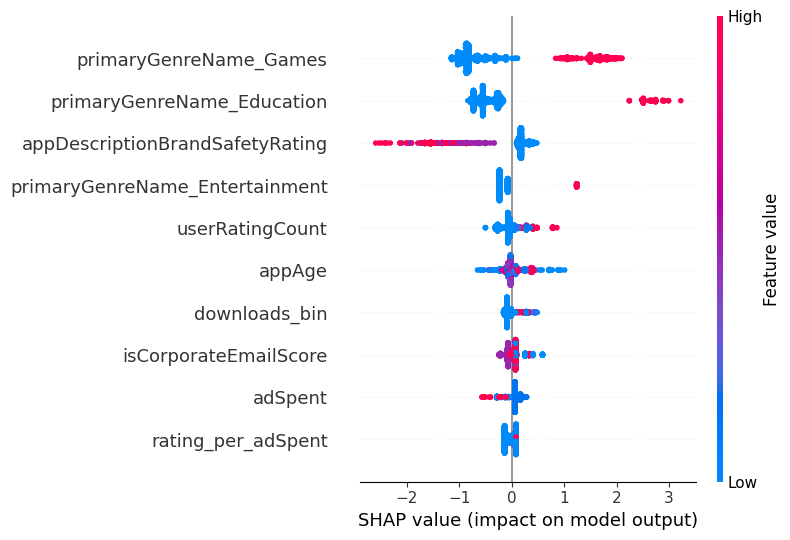

In [72]:
shap.summary_plot(shap_exp, X_val,max_display=10)

# 6. Prediction

In [182]:
fin_weights = compute_sample_weight(
    class_weight='balanced',
    y=y #provide your own target name
)

In [82]:
sub_xgb = XGBClassifier(**tuned_params, random_state=STATE, eval_metric="auc",objective='binary:logistic',device="cuda")
sub_xgb.fit(X, y,sample_weight=fin_weights, verbose=False)

XGBClassifier(alpha=3.457099450095575e-05, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.996536218956606, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.1831147957616661, eval_metric='auc', feature_types=None,
              gamma=7.051302105750543e-06, grow_policy='depthwise',
              importance_type=None, interaction_constraints=None,
              lambda=0.05214928218068985, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, ...)

In [83]:
fin_test = test.copy()
fin_test.drop(columns=['ID'], inplace=True)

In [183]:
# fin_proc = preprocess_data(fin_test,is_train=False)
fin_proc = base_process(fin_test,is_train=False)

In [184]:
fin_proc.head()

,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating,developerCountry_ADDRESS NOT LISTED IN PLAYSTORE,developerCountry_ALBANIA,developerCountry_ALGERIA,developerCountry_ANDORRA,developerCountry_ANGOLA,...,deviceType_undetermined,hasPrivacyLink_False,hasPrivacyLink_True,hasPrivacyLink_nan,appDescriptionBrandSafetyRating_high,appDescriptionBrandSafetyRating_low,appDescriptionBrandSafetyRating_medium,mfaRating_high,mfaRating_low,mfaRating_medium
0,2,0.0,7.750849,81.600000,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,0.0,0.027742,24.700000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,13059,99.0,9.249056,40.300000,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,0.0,7.750849,39.233333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,0.0,7.750849,65.533333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [185]:
# preds = fin_xgb.predict_proba(fin_proc)[:, 1]
preds = xgb.predict_proba(fin_proc)[:, 1]
submission = pd.DataFrame({
    'ID': test['ID'],
    'coppaRisk': preds
})

# 7. Submission

In [186]:
submission.to_csv(os.path.join(OUTPUT_DIR, 'submission13.csv'), index=False)
print("Submission file created successfully.")

Submission file created successfully.
